<a href="https://colab.research.google.com/github/Sanjay7231/Machine_learning_CH.SC.U4CSE23251/blob/Lab-Experiments/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer.csv to breast_cancer.csv


In [ ]:
col_names=[
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
    "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
    "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se",
    "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
    "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst",
    "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"
]
data = pd.read_csv('breast_cancer.csv', header=0, names=col_names)
print(data.keys())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [13]:
data = pd.read_csv("breast_cancer.csv", header=0, names=col_names)
print(data.shape)
print(data.head())

(569, 32)
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302    M      17.99        10.38        122.80          1001.0    0.11840   
842517    M      20.57        17.77        132.90          1326.0    0.08474   
84300903  M      19.69        21.25        130.00          1203.0    0.10960   
84348301  M      11.42        20.38         77.58           386.1    0.14250   
84358402  M      20.29        14.34        135.10          1297.0    0.10030   

          smoothness_mean  compactness_mean  concavity_mean  \
842302            0.27760            0.3001         0.14710   
842517            0.07864            0.0869         0.07017   
84300903          0.15990            0.1974         0.12790   
84348301          0.28390            0.2414         0.10520   
84358402          0.13280            0.1980         0.10430   

          concave points_mean  ...  radius_worst  texture_worst  \
842302                 0.2419  ...         17.33         184.60

In [14]:
df1 = data.drop(columns=["id", "diagnosis"])
print(df1.head())

          radius_mean  texture_mean  perimeter_mean  area_mean  \
842302          10.38        122.80          1001.0    0.11840   
842517          17.77        132.90          1326.0    0.08474   
84300903        21.25        130.00          1203.0    0.10960   
84348301        20.38         77.58           386.1    0.14250   
84358402        14.34        135.10          1297.0    0.10030   

          smoothness_mean  compactness_mean  concavity_mean  \
842302            0.27760            0.3001         0.14710   
842517            0.07864            0.0869         0.07017   
84300903          0.15990            0.1974         0.12790   
84348301          0.28390            0.2414         0.10520   
84358402          0.13280            0.1980         0.10430   

          concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
842302                 0.2419        0.07871                  1.0950  ...   
842517                 0.1812        0.05667                  0.5435  

In [18]:
df2 = df1.drop(columns=["fractal_dimension_worst"])
sc = StandardScaler()
scaled_data = sc.fit_transform(df2)

principal = PCA(n_components=3)
x = principal.fit_transform(scaled_data)

print("Shape after PCA:", x.shape)
print("Explained Variance Ratio:", principal.explained_variance_ratio_)

Shape after PCA: (569, 3)
Explained Variance Ratio: [0.43706363 0.18472237 0.09716239]


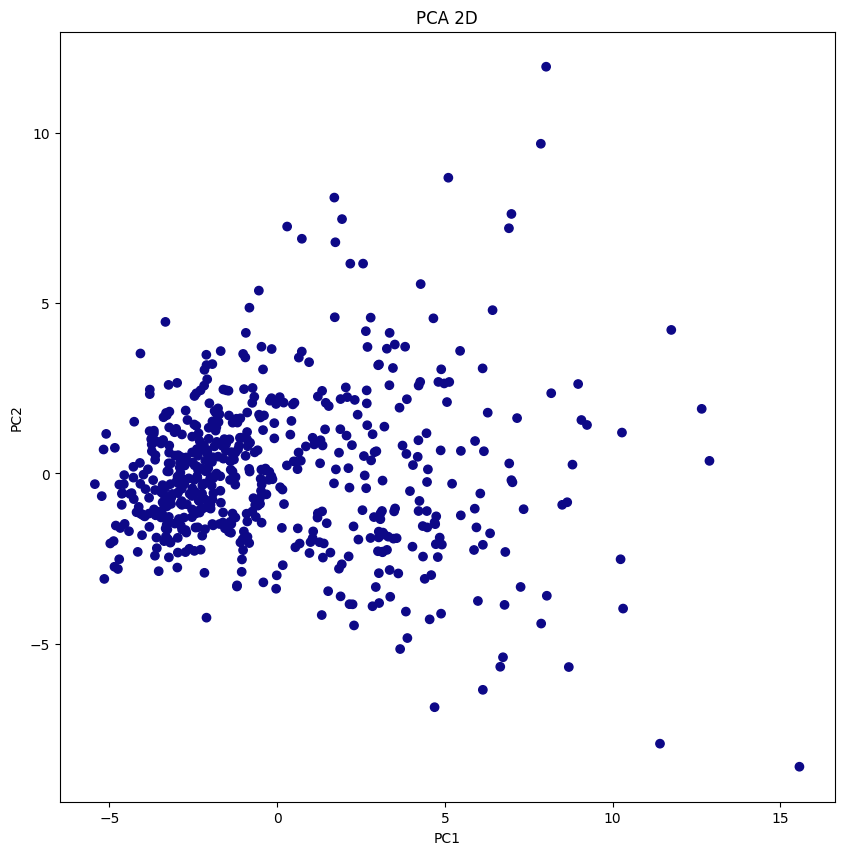

In [20]:
plt.figure(figsize=(10,10))
plt.title("PCA 2D")
plt.scatter(x[:,0], x[:,1], c=(data["diagnosis"]=="M").astype(int), cmap="plasma")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

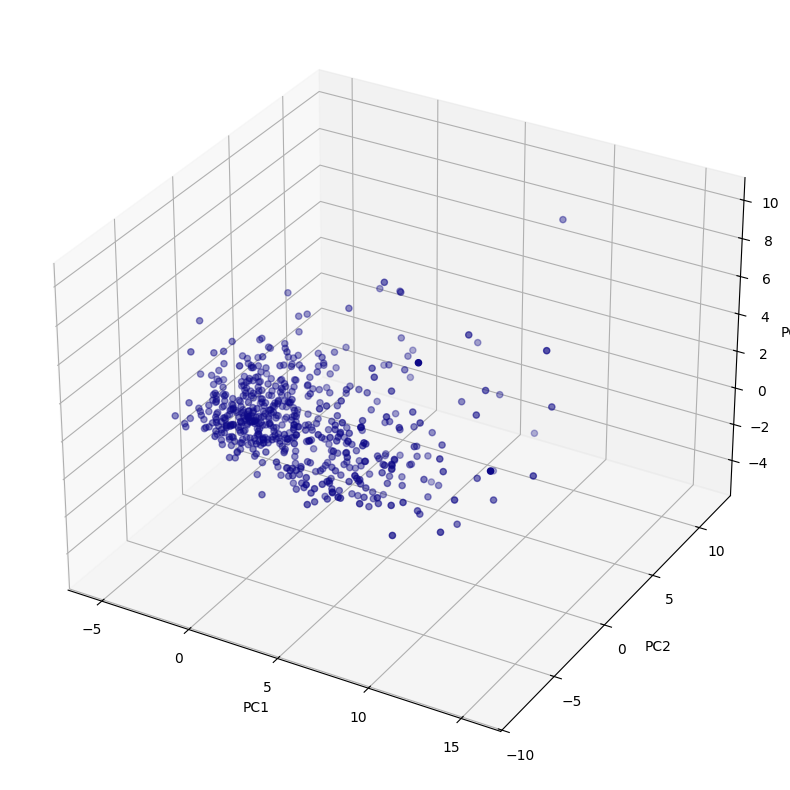

In [21]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x[:,0], x[:,1], x[:,2], c=(data["diagnosis"]=="M").astype(int), cmap="plasma")

axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.show()

PCA Exercise

In [27]:
import seaborn as sns

In [22]:
uploaded = files.upload()

Saving pca_variables.csv to pca_variables.csv


In [23]:
df = pd.read_csv("pca_variables.csv")
print("Dataset:\n", df)

Dataset:
          Variable    PC1    PC2    PC3
0         Climate  0.190  0.017  0.207
1         Housing  0.544  0.020  0.204
2          Health  0.782 -0.605  0.144
3           Crime  0.365  0.294  0.585
4  Transportation  0.585  0.085  0.234
5       Education  0.394 -0.273  0.027
6            Arts  0.985  0.126 -0.111
7      Recreation  0.520  0.402  0.519
8         Economy  0.142  0.150  0.239


In [24]:
print("\nDominant Variable for each Principal Component:")
for pc in ["PC1", "PC2", "PC3"]:
    idx = df[pc].abs().idxmax()
    print(f"{pc} is mainly explained by: {df.loc[idx, 'Variable']} "
          f"(loading={df.loc[idx, pc]})")


Dominant Variable for each Principal Component:
PC1 is mainly explained by: Arts (loading=0.985)
PC2 is mainly explained by: Health (loading=-0.605)
PC3 is mainly explained by: Crime (loading=0.585)


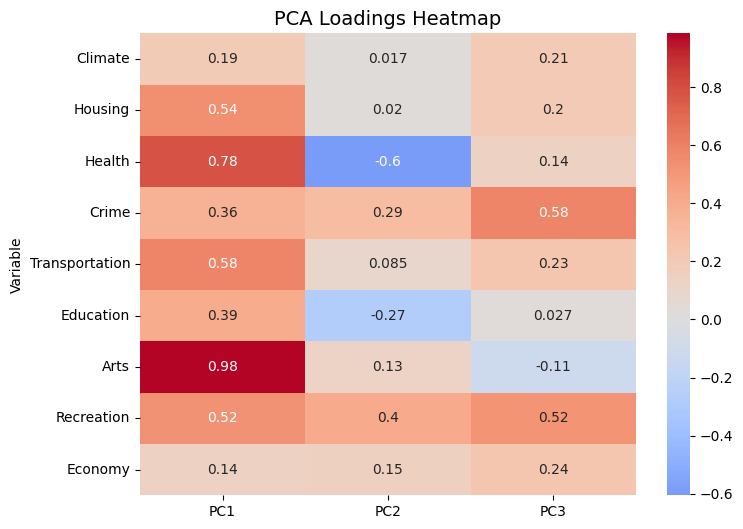

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.set_index("Variable"), annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap", fontsize=14)
plt.show()